# Gordon Growth Model from a Quant Perspective
Analyzing the distribution of implied discount rates across all the S&P500 components.

In [1]:
import yfinance as yf
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
stocks=pd.read_excel('SP500.xlsx')['Stock'].iloc[:-1].tolist()
rm=yf.download('^GSPC')['Adj Close'].pct_change().dropna().mean()*252
rf=0.001

[*********************100%***********************]  1 of 1 completed


In [3]:
def growth_rate(rm,rf,stock): 
    tick=yf.Ticker(stock)
    info=tick.info
    
    beta=info['beta']
    eps=info['forwardEps']
    mcap=info['marketCap']
    price=info['previousClose']
    
    r=rf+beta*(rm-rf)
    g=r-eps/price
    
    return r,g,mcap

In [4]:
df=pd.DataFrame(columns=['r','g','mcap'],index=stocks)
for i in tqdm(df.index):
    try:
        values=growth_rate(rm,rf,i)
        df['r'].loc[i]=values[0]
        df['g'].loc[i]=values[1]
        df['mcap'].loc[i]=values[2]
    except:
        pass
df.dropna(inplace=True)

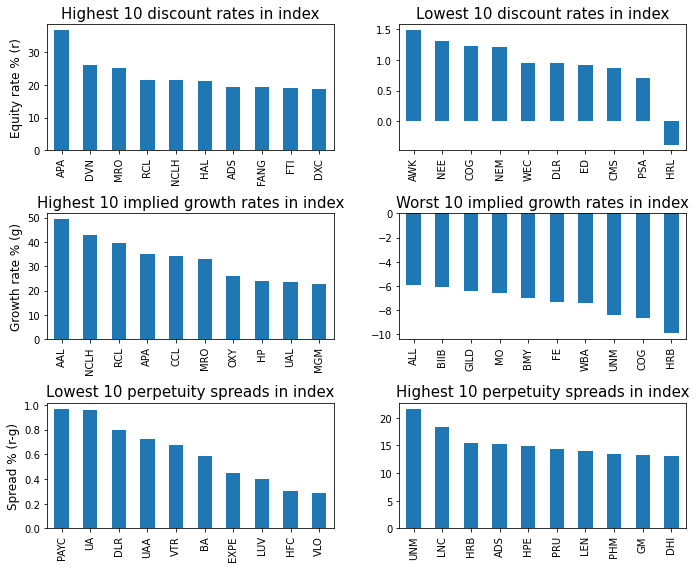

In [5]:
fig,axes=plt.subplots(3,2,figsize=(10,8))
(df['r'].sort_values(ascending=False).iloc[:10]*100).plot(kind='bar',ax=axes[0,0])
axes[0,0].set_title('Highest 10 discount rates in index',fontsize=15)
(df['r'].sort_values(ascending=False).iloc[-10:]*100).plot(kind='bar',ax=axes[0,1])
axes[0,1].set_title('Lowest 10 discount rates in index',fontsize=15)
axes[0,0].set_ylabel('Equity rate % (r)',fontsize=12)

(df['g'].sort_values(ascending=False).iloc[:10]*100).plot(kind='bar',ax=axes[1,0])
axes[1,0].set_title('Highest 10 implied growth rates in index',fontsize=15)
(df['g'].sort_values(ascending=False).iloc[-10:]*100).plot(kind='bar',ax=axes[1,1])
axes[1,1].set_title('Worst 10 implied growth rates in index',fontsize=15)
axes[1,0].set_ylabel('Growth rate % (g)',fontsize=12)

((df['r']-df['g']).sort_values(ascending=False).iloc[:10]*100).plot(kind='bar',ax=axes[2,1])
axes[2,1].set_title('Highest 10 perpetuity spreads in index',fontsize=15)
((df['r']-df['g'])[(df['r']-df['g'])>0].sort_values(ascending=False).iloc[-10:]*100).plot(kind='bar',ax=axes[2,0])
axes[2,0].set_title('Lowest 10 perpetuity spreads in index',fontsize=15)
axes[2,0].set_ylabel('Spread % (r-g)',fontsize=12)

plt.tight_layout()

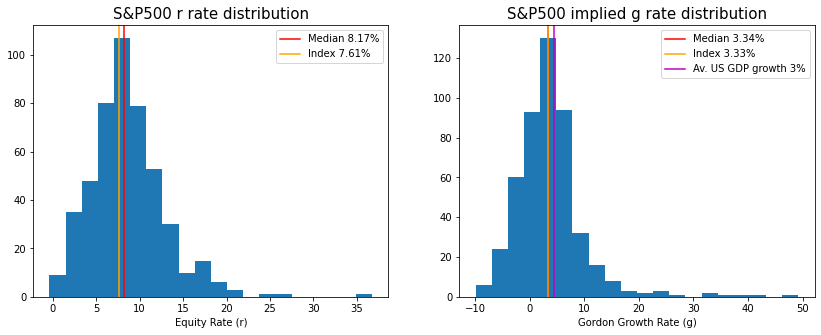

In [6]:
fig,ax=plt.subplots(1,2,figsize=(14,5))

ax[0].hist(df['r']*100,bins=20)
ax[0].axvline(df['r'].median()*100,c='r',label='Median '+str(round(df['r'].median()*100,2))+'%' )
ax[0].axvline(rm*100,c='orange',label='Index '+str(round(rm*100,2))+'%')
ax[0].set_xlabel('Equity Rate (r)')
ax[0].legend(loc=0)
ax[0].set_title('S&P500 r rate distribution',fontsize=15)

ax[1].hist(df['g']*100,bins=20)
ax[1].axvline(df['g'].median()*100,c='r',label='Median '+str(round(df['g'].median()*100,2))+'%' )
ax[1].axvline(sum(df['g']*df['mcap'])/sum(df['mcap'])*100
              ,c='orange',label='Index '+str(round(sum(df['g']*df['mcap'])/sum(df['mcap'])*100,2))+'%')
ax[1].axvline(4.5,c='m',label='Av. US GDP growth '+str(3)+'%')
ax[1].set_xlabel('Gordon Growth Rate (g)')
ax[1].legend(loc=0)
ax[1].set_title('S&P500 implied g rate distribution',fontsize=15)

plt.show()

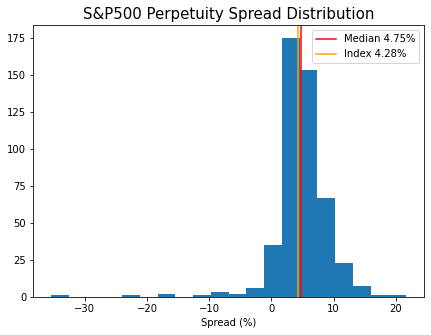

In [7]:
fig=plt.figure(figsize=(7,5))
plt.title('S&P500 Perpetuity Spread Distribution',fontsize=15)
plt.xlabel('Spread (%)')
plt.hist((df['r']-df['g'])*100,bins=20)
plt.axvline((df['r']-df['g']).median()*100,c='r',label='Median '+str(round((df['r']-df['g']).median()*100,2))+'%')
plt.axvline(rm*100-sum(df['g']*df['mcap'])/sum(df['mcap'])*100
              ,c='orange',label='Index '+str(round(rm*100-sum(df['g']*df['mcap'])/sum(df['mcap'])*100,2))+'%')
plt.legend(loc=0)
